#**Exploratory Data Analysis (EDA) on NYC Airbnb-:**

##Airbnb is an online marketplace that connects people who want to rent out their homes with people looking for accommodations in that locale. NYC is the most populous city in the United States, and one of the most popular tourism and business places globally.
##Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Nowadays, Airbnb became one of a kind service that is used by the whole world. Data analysts become a crucial factor for the company that provided millions of listings through Airbnb. These listings generate a lot of data that can be analyzed and used for security, business decisions, understanding of customers’ and providers’ behavior on the platform, implementing innovative additional services, guiding marketing initiatives, and much more.

##**Explore and analyze the data to discover key understandings (not limited to these) such as :**



* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?


#**What does Airbnb stand for?**

Airbnb is an abbreviation for Air mattress Bed and Breakfast.

#NAME:- ROHAN DINDA
#BATCH :- COHORT REPUBLIC

#Let's Begin:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ar = pd.read_csv('/content/drive/MyDrive/EDA-Airbnb_NYC_2019/Airbnb NYC 2019.csv')

##I have imported the Dataset.

#Looking at the Dataset

In [ ]:
#Checking the Head of our Dataframe.
ar.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Checking the Shape of out Dataframe.
ar.shape

(48895, 16)

We can see it has 48895 rows and 16 column.

In [ ]:
#Checking the datatypes of all the columns.
ar.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
#Checking the columns names.
ar.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#**Insights on Variables**
###Each property has particular Host_id, but particular host could have multiple properties available for listing.

###Categorical Variables : name,host_name ,neighbourhood_group,neighbourhood,room_type.

###Numerical variables :id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365.

#**Attributes of each variable:**

##**id** : Unique for each Propety Listing.
##**name** : Name of the each Propety Listing.
##**host_id** : Unique ID for host who have listed the property on Airbnb.
##**host_name** : Name of host
##**neighbourhood_group** : Name of Each boroughs of NYC, Manhattan, Brooklyn,Queens,Bronx, State Island.
##**neighbourhood** : Area in each borough of NYC
##**latitude, longitude** : Co-ordinates of each listed property
##**room_type** : Differnt types of room available for listing , Private room,Entire home/apt,Shared room.
##**price** : Price of listing.
##**minimum_nigths** : Mandatory number of nights to be booked for available foe each type of property.
##**number_of_review** : Number of reviews for each Listed property
##**last_review** : Date on whcih last time the listing was reviewed
##**review_per_month** : Number of reviews per month
##**calculated_host_listings_count** : Number of listing each host owns
##**availablity_365** : Number of days the given listing is available for booking

#**Understanding, Wrangling and cleaning Data:**

In [ ]:
#Checking for the null values in each column.
ar.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

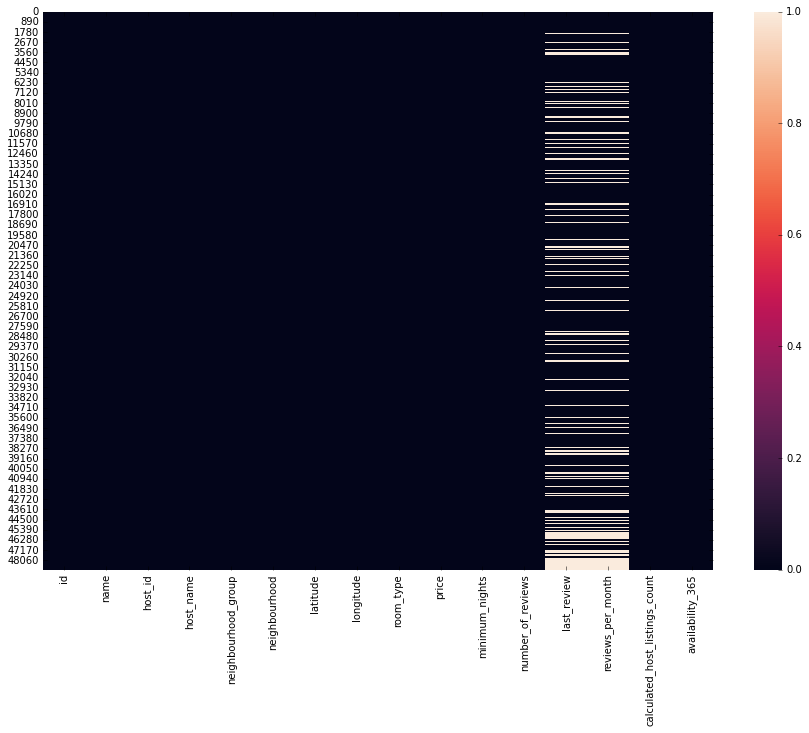

In [ ]:
# Plotting heatmap of null values

fig,axes = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(ar.isna())
plt.show()

It is clear that the column named **'last_review'** and **'reviews_per_month'** have the most missing values.

'last_review' is the date, if the listing had no reviews, the date would simply not exist. Appending those values is unnecessary in our case because this column is irrelevant and insignificant.

**Let's delete this column.**


In [ ]:
#deleting the less needed columns.
ar.drop(['id','last_review','host_name'],axis=1,inplace=True)

In [ ]:
ar.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


##All the NaN values must be replaced.

In [ ]:
#replacing NaN values in 'reviews_per_month' qith 0.
ar.fillna({'reviews_per_month':0},inplace=True)
#examing changes
ar.reviews_per_month.isnull().sum()



0

#**Let's look at some intriguing category unique values now.**

In [ ]:
ar.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# Examining the unique values of all the columns, since this will come in helpful for later analysis
ar['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#Examining the unique values of "neighborhood" will be very useful for later analysis, just as this column will be very useful for later analysis.
ar['neighbourhood'].value_counts()


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
# Examining the unique values of "room_type" will be very useful for later analysis, just as this column will be very useful for later analysis.
ar['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**Therefore, understanding unique values and categorical data that I have in our dataset was the last step I had to do. It appears that I shall be doing some mapping for the values of those columns in order to prepare the information for predictive analysis.**

# **Exploring and Visualizing Data**

Now it's ready to begin exploring our data, I can establish a rule that I will work from left to right. Certain may choose to do this because of its set approach - some datasets have a large number of attributes, and this way I will remember to study each column separately to ensure I learn as much as possible about our dataset.

# **I shall begin from left column to right column and first I shall take "host_ID"**

In [ ]:
ar.head(2)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


#host_id

In [ ]:
# Creating dataFrame for the unique number of hosts in each borough
Number_host =ar[['host_id','neighbourhood_group']].drop_duplicates().groupby(['neighbourhood_group']).count().sort_values('host_id',ascending = False).reset_index()
Number_host

,neighbourhood_group,host_id
0,Manhattan,16578
1,Brooklyn,15966
2,Queens,3983
3,Bronx,789
4,Staten Island,256


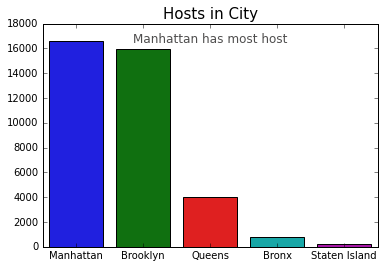

In [ ]:
#VisualiZing the HOST distribution

sns.barplot(data=Number_host, x="neighbourhood_group", y="host_id")
plt.title('Hosts in City', size=15)
plt.xlabel('')
plt.ylabel('')
plt.text(x=2, y=16500, s='Manhattan has most host', color='#4f4e4e', fontsize=12, horizontalalignment='center')
plt.show()




In [ ]:
# Returning to our dataset, we may corroborate our findings using an already existing column named 'calculated_host_listings_count'
top_host_check=ar.calculated_host_listings_count.max()
top_host_check

327

In [ ]:
#creating a data frame for all the top hosts.
top_host=ar['host_id'].value_counts()
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Host_ID_count'}, inplace=True)
top_host_df.head(10)

,Host_ID,Host_ID_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


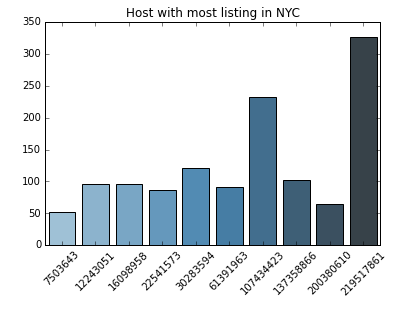

In [ ]:
sns.barplot(x='Host_ID', y='Host_ID_count', data=top_host_df.head(10), palette="Blues_d")
plt.title("Host with most listing in NYC")
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=45)

plt.show()

Therefore, top ten hosts with the most listing have a good dispersion, which is interesting to see. Around 300 listings are on the first host.

#**Neighbourhood Groups:**

In [ ]:
ar.head(2)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [ ]:
#Let's see the bookigs in the area of the NYC.
ar['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

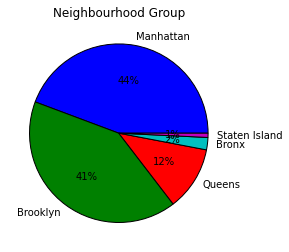

In [ ]:
#Plotting a pie chart.
plt.title('Neighbourhood Group')
plt.pie(ar['neighbourhood_group'].value_counts(),labels=ar['neighbourhood_group'].value_counts().index,autopct='%.0f%%')
plt.show()

In [ ]:
#creating a database of bookings in each boroughs
grp_neighbourhood = ar['neighbourhood_group'].value_counts().to_frame().reset_index()
grp_neighbourhood.columns = ['neighbourhood_group','Count']
grp_neighbourhood

,neighbourhood_group,Count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


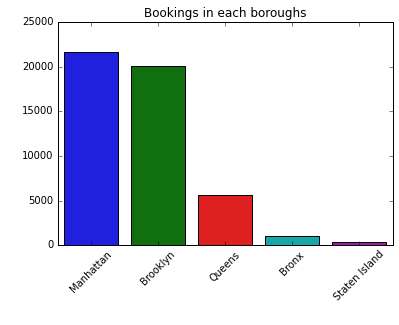

In [ ]:
sns.barplot(data=grp_neighbourhood,x='neighbourhood_group',y='Count')
plt.title("Bookings in each boroughs")
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=45)
plt.show()


 **It is quite clear from this chart that "Manhattan" and "Brooklyn" have the most hotel properties.**

#**Let's find out the average price, density and distribution of prices for each neighbourhood_group: "Brooklyn," "Manhattan," "Queens," "Staten Island," and "Bronx".**

In [ ]:
ar.head(2)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


##Analysing the price with respect to the 'neighbourhood_group'.

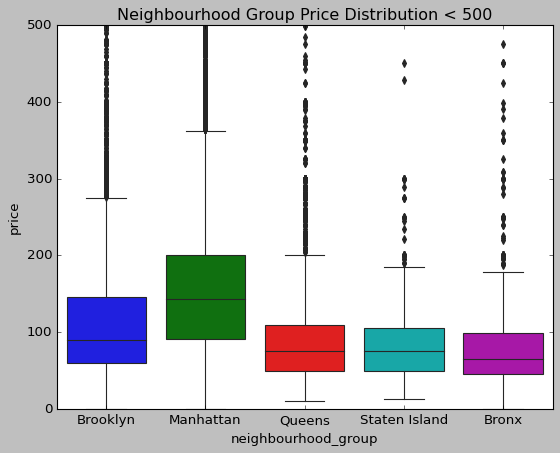

In [ ]:
#Using a Box plot.
plt.style.use('classic')
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ar[ar.price<500])
plt.show()

Therefore, using a statistical table and a Box plot, we can see a few things about the distribution of Airbnb pricing throughout the NYC boroughs.

**Manhattan** is the **most expensive** as the rental charges are more evenly distributed across all the price ranges.

**Median price** in Manhattan is **approx $150** thats around double the Median price of Bronx

The distributions in **Queens and Staten Island** appear to be very similar, while the **Bronx** appears to be the **cheapest of the three**.

For instance, given that **Manhattan** is unquestionably one of the **most expensive** cities in the world to live in, and the Bronx appears to have lower living standards and the chepest. Lastly, this price distribution and density were entirely predictable.

#**Room Types.**

In [ ]:
ar.head(2)


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


##Let's see the types of room.

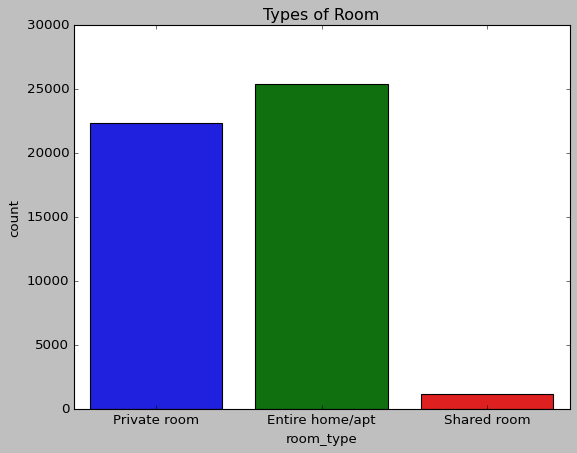

In [ ]:
sns.countplot(ar['room_type'])
plt.title("Types of Room")
plt.show()

Therefore, we can observe that the **Entire Home/Apartment** has the highest share, followed by the Private Room, and the least preferred is Shared Room.

#**Let’s see room types occupied by a neighborhood group.**

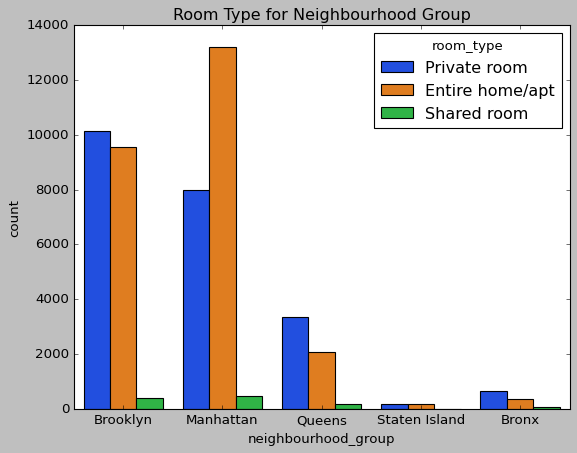

In [ ]:
sns.countplot(ar['neighbourhood_group'],hue=ar['room_type'],palette="bright")
plt.title('Room Type for Neighbourhood Group')
plt.show()

The graph shows that the **Entire Home/Apartment** is listed most near **Manhattan**, while **Private Rooms** and Apartments Near **Brooklyn** are **Nearly equal**.

#**Neighbourhoods:**

In [ ]:
ar.head(2)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


##Let's just take the top "neighborhoods" with the most listings-

In [ ]:
#Let's find the top 10 neighbourhood.
top_N = ar['neighbourhood'].value_counts().head(10)

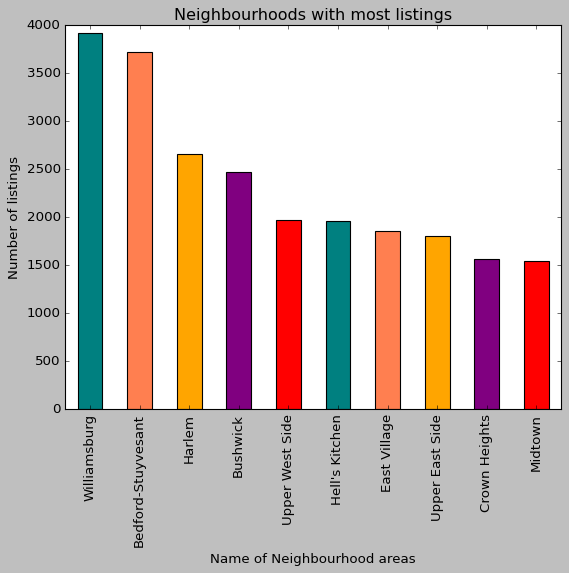

In [ ]:
top_N.plot(kind='bar',color= ['teal','coral','orange','purple','red'])
plt.title('Neighbourhoods with most listings')
plt.ylabel('Number of listings')
plt.xlabel('Name of Neighbourhood areas')
# plt.xticks(rotation=45)
plt.show()

##Let's check on overall distribution of availability in each boroughs.

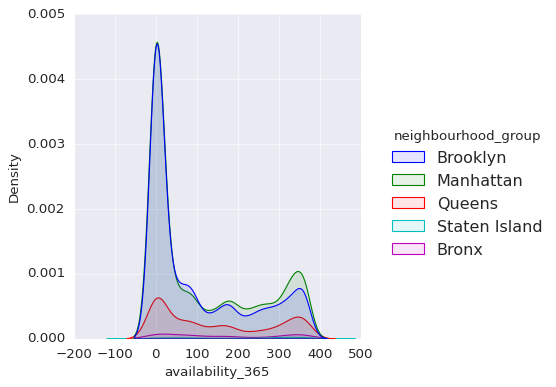

In [ ]:
#creating the KDE plot
sns.set_style("darkgrid")
sns.displot(data= ar, x= "availability_365", kind="kde",hue = 'neighbourhood_group',fill = True,alpha = 0.1)
plt.show()

Room availability pattern for **Manhattan** and **Brooklyn** is identical with same peak **close the zero**, this shows most of the Listing are **not available** for booking in Manhattan and Brooklyn.

#**Longitude and Latitude.**


In [ ]:
ar.head(2)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


##Hotel bookings in different areas on the map of NYC-

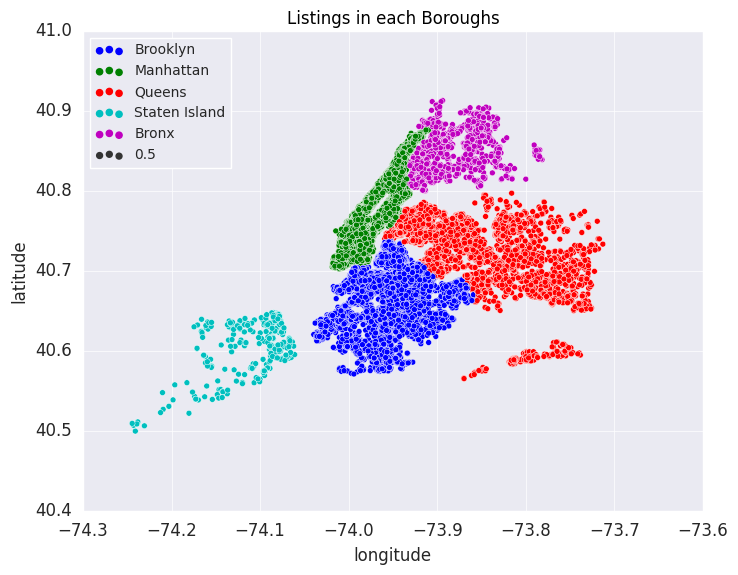

In [ ]:
plt.rcParams['figure.dpi'] = 100
sns.scatterplot(data= ar,x='longitude',y='latitude',hue='neighbourhood_group',size=0.5)
plt.legend(loc="upper left", frameon=True, fontsize= 10)
plt.title("Listings in each Boroughs", size=12, color='black')
plt.show()

This map shows all the five areas in NewYork city with different colour with the latitude and longtitude.

#**Let's Analyze the Number_of_reviews:**

In [ ]:
ar.head(2)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [ ]:
#Let's see the top reviewed records.
top_rev = ar.sort_values('number_of_reviews',ascending=False).head(10)
top_rev

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


##Average price of top ten reviewed hotels-

In [ ]:
price_avrg=top_rev.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


#**Let’s see the correlation between the columns.**

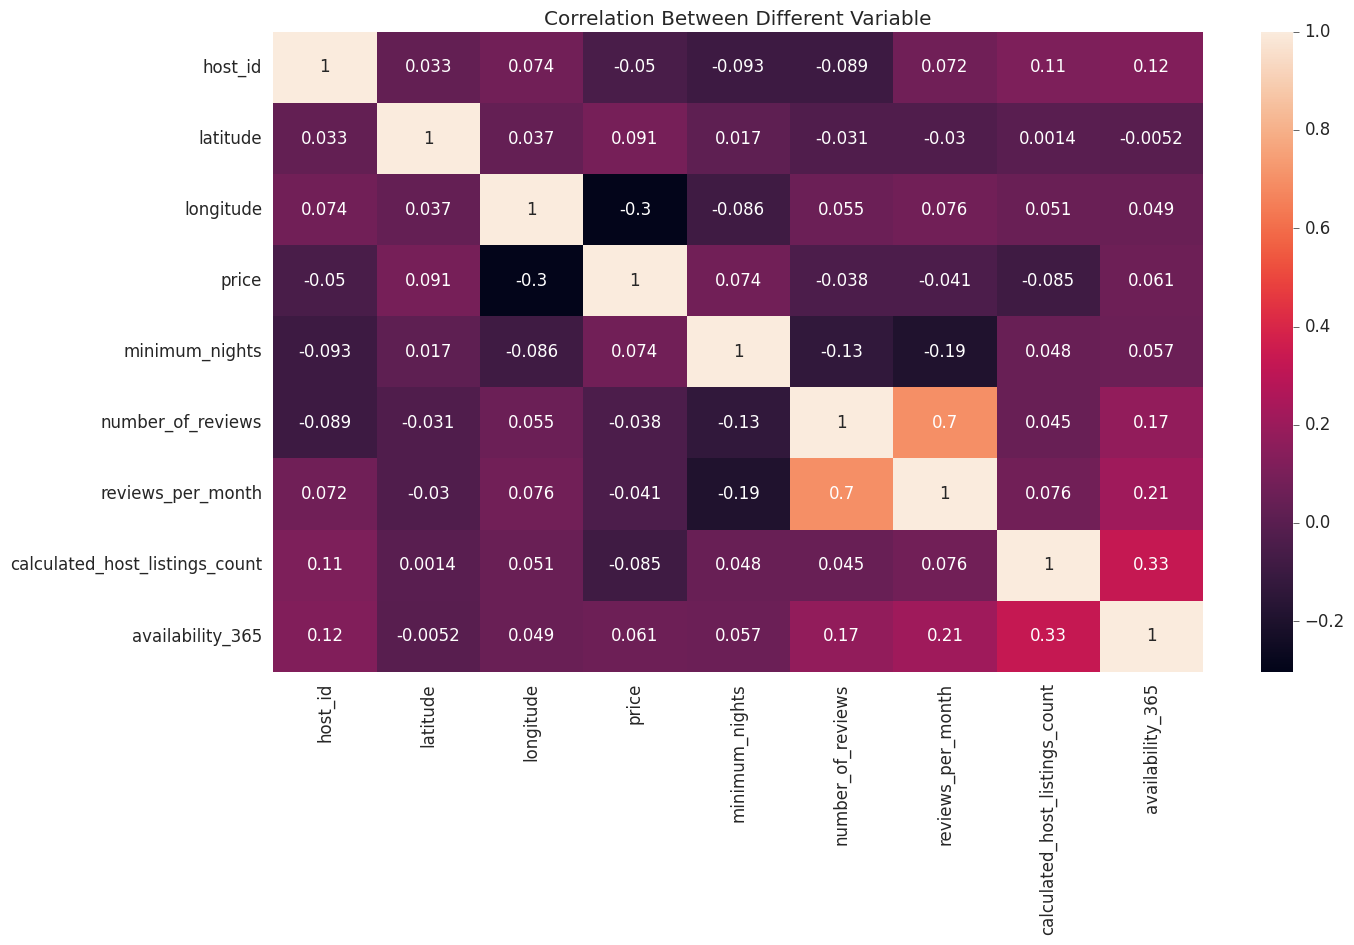

In [ ]:
cor_mat = ar.corr(method='kendall')
cor_mat.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(15,8))
plt.title('Correlation Between Different Variable')
sns.heatmap(cor_mat,annot=True)
plt.show()

###From the graph above, we know that there is not a strong correlation except review_per_month and number_of_review.

#**Conclusion**

##Summarizing our findings, suggesting other features

This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to dive deep into each significant column presented.

To begin, firstly, we identified the data of top ten **host_id** and we figured out that top host ID has **327** listings.

Secondly, we take **"Neighbourhood_Group"**, and we found that Airbnb listings in New York City are concentrated in five neighborhoods: **"Brooklyn," "Manhattan," "Queens," "Staten Island," and "Bronx"**. Moreover, we also learned from this chart that **"Manhattan"** and **"Brooklyn"** have the **most hotel** properties. Then, we found that **Manhattan** is the **most expensive** as the rental charges are more evenly distributed across all the price ranges, **median price** in Manhattan is approx **$150** thats around **double** the **median price** of **Bronx** and the distributions in **Queens** and **Staten Island** appear to be very **similar**, while the **Bronx** appears to be the **cheapest** of the three.

Thirdly, we take the data of **"room_type"** and figured out that it is devided into three subcategaries and we can observe that the **Entire Home/Apartment **has the **highest share**, followed by the **Private Room**, and the least preferred is **Shared Room**. Futhermore, entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

Fourthly, we put our **latitude** and **longitude** columns to good use by creating a **geographical map** of **Newyork city** which represents the location of all the areas with their latitude and longtitude.

Finally, we looked for the listings with the **"most reviews"**. Count the rating of top ten reviewed hotels, and found out The **top 10 most reviewed** listings on Airbnb for NYC have an average price of $65 per night.

The majority of them under $50, and 9/10 of them are "Private Room" types, with the top reviewed listing having 629 reviews.